In [2]:
import pyart
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
%matplotlib inline

In [3]:
ARX = pyart.io.read('/Users/rjackson/earnest/data/KARX20200810_154639_V06')
DMX = pyart.io.read('/Users/rjackson/earnest/data/KDMX20200810_154746_V06')
DVN = pyart.io.read('/Users/rjackson/earnest/data/KDVN20200810_154536_V06')
FSD = pyart.io.read('/Users/rjackson/earnest/data/KFSD20200810_154321_V06')
OAX = pyart.io.read('/Users/rjackson/earnest/data/KOAX20200810_154304_V06')

(-200.0, 0.0)

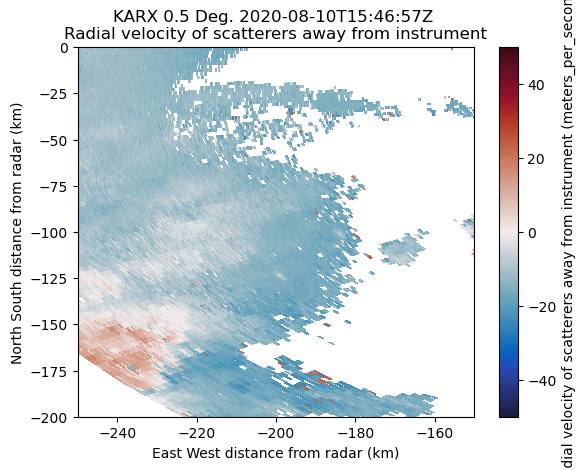

In [11]:
disp = pyart.graph.RadarMapDisplay(ARX)
disp.plot_ppi('velocity', sweep=1, vmin=-50, vmax=50, cmap='pyart_balance')
plt.xlim([-250, -150])
plt.ylim([-200, 0])

(-100.0, 100.0)

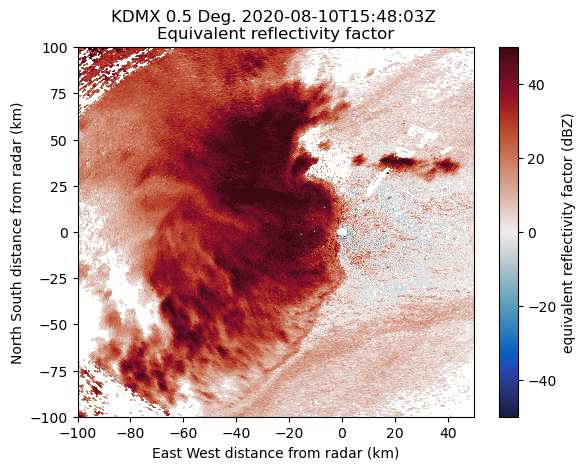

In [33]:
disp = pyart.graph.RadarMapDisplay(DMX)
disp.plot_ppi('velocity', sweep=1, vmin=-50, vmax=50, cmap='pyart_balance')
plt.xlim([-100, 50])
plt.ylim([-100, 100])

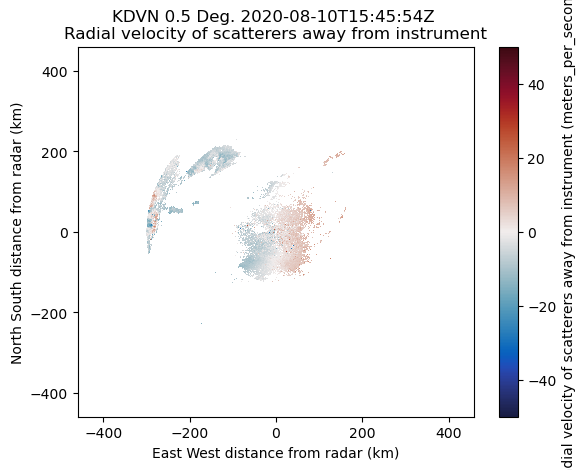

In [14]:
disp = pyart.graph.RadarMapDisplay(DVN)
disp.plot_ppi('velocity', sweep=1, vmin=-50, vmax=50, cmap='pyart_balance')
#plt.xlim([-100, 50])
#plt.ylim([-100, 100])

(0.0, 200.0)

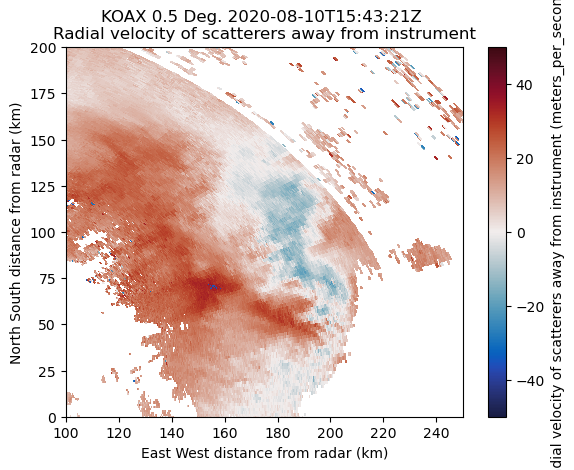

In [16]:
disp = pyart.graph.RadarMapDisplay(OAX)
disp.plot_ppi('velocity', sweep=1, vmin=-50, vmax=50, cmap='pyart_balance')
plt.xlim([100, 250])
plt.ylim([0, 200])

In [36]:
DMX_gatefilter = pyart.filters.GateFilter(DMX)
#DMX_gatefilter.exclude_below('cross_correlation_ratio', 0.9)
DMX_gatefilter.exclude_below('reflectivity', 0)
DMX_gatefilter = pyart.correct.despeckle_field(DMX, 'velocity', gatefilter=DMX_gatefilter)

(-100.0, 100.0)

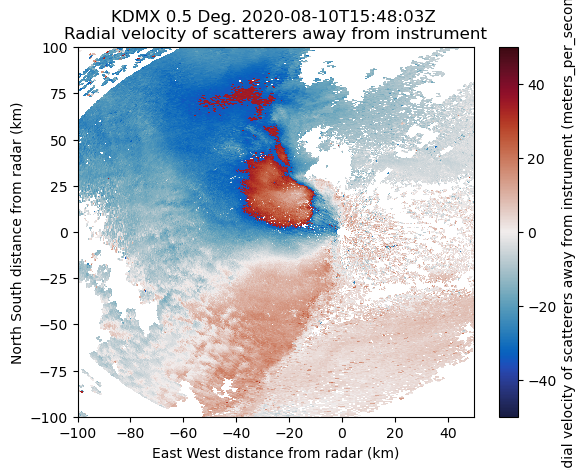

In [38]:
disp = pyart.graph.RadarMapDisplay(DMX)
disp.plot_ppi('velocity', sweep=1, vmin=-50, vmax=50, cmap='pyart_balance', gatefilter=DMX_gatefilter)
plt.xlim([-100, 50])
plt.ylim([-100, 100])

In [40]:
corrected_velocity = pyart.correct.dealias_region_based(DMX, gatefilter=DMX_gatefilter, centered=True)
DMX.add_field('corrected_velocity', corrected_velocity, replace_existing=True)

(-100.0, 100.0)

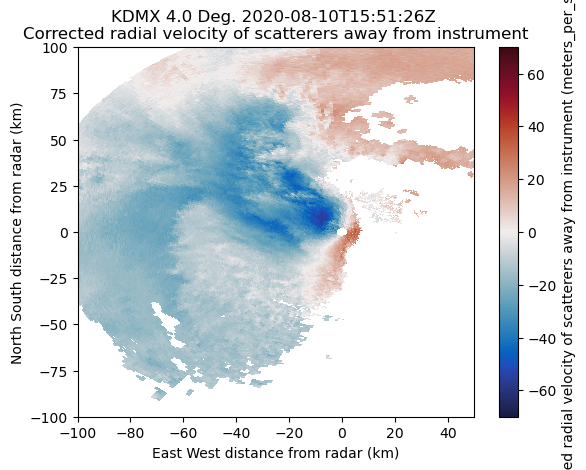

In [52]:
disp = pyart.graph.RadarMapDisplay(DMX)
disp.plot_ppi('corrected_velocity', sweep=13, vmin=-70, vmax=70, cmap='pyart_balance', gatefilter=DMX_gatefilter)
plt.xlim([-100, 50])
plt.ylim([-100, 100])

In [55]:
OAX_gatefilter = pyart.filters.GateFilter(OAX)
#DMX_gatefilter.exclude_below('cross_correlation_ratio', 0.9)
OAX_gatefilter.exclude_below('reflectivity', 0)
OAX_gatefilter = pyart.correct.despeckle_field(OAX, 'velocity', gatefilter=OAX_gatefilter)
corrected_velocity = pyart.correct.dealias_region_based(OAX, gatefilter=OAX_gatefilter, centered=True)
OAX.add_field('corrected_velocity', corrected_velocity, replace_existing=True)

(0.0, 200.0)

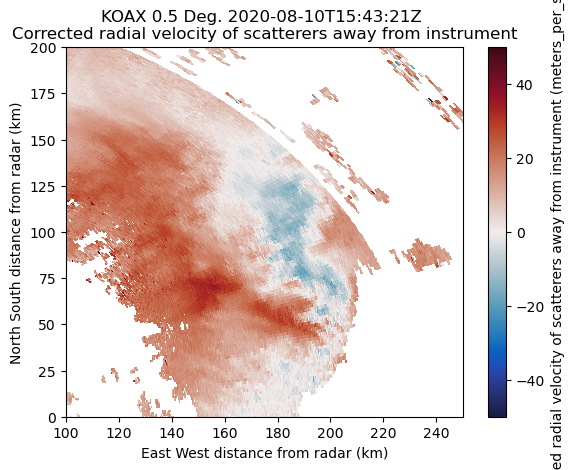

In [56]:
disp = pyart.graph.RadarMapDisplay(OAX)
disp.plot_ppi('corrected_velocity', sweep=1, vmin=-50, vmax=50, cmap='pyart_balance')
plt.xlim([100, 250])
plt.ylim([0, 200])